<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv(r'/datasets/Churn.csv') 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
# Приводим к нижнему регистру
data.columns = data.columns.str.lower()

In [8]:
data.duplicated().sum()

0

In [9]:
#Пропущено значений 
for index in data:
    nan = len(data[data[index].isna()])
    print ('Пропущено значений:', index, nan, ', из:', len(data))

Пропущено значений: rownumber 0 , из: 10000
Пропущено значений: customerid 0 , из: 10000
Пропущено значений: surname 0 , из: 10000
Пропущено значений: creditscore 0 , из: 10000
Пропущено значений: geography 0 , из: 10000
Пропущено значений: gender 0 , из: 10000
Пропущено значений: age 0 , из: 10000
Пропущено значений: tenure 909 , из: 10000
Пропущено значений: balance 0 , из: 10000
Пропущено значений: numofproducts 0 , из: 10000
Пропущено значений: hascrcard 0 , из: 10000
Пропущено значений: isactivemember 0 , из: 10000
Пропущено значений: estimatedsalary 0 , из: 10000
Пропущено значений: exited 0 , из: 10000


In [10]:
data['tenure'].unique() 

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [11]:
data['tenure'].head()

0    2.0
1    1.0
2    8.0
3    1.0
4    2.0
Name: tenure, dtype: float64

In [12]:
Tenure_avg = data['tenure'].median() #получение медианы для 
Tenure_avg
data['tenure'] = data['tenure'].fillna(value = Tenure_avg) #замена пропущенных значений в столбце age на медианы
data['tenure'].head(10)

0    2.0
1    1.0
2    8.0
3    1.0
4    2.0
5    8.0
6    7.0
7    4.0
8    4.0
9    2.0
Name: tenure, dtype: float64

In [13]:
#Пропущено значений 
for index in data:
    nan = len(data[data[index].isna()])
    print ('Пропущено значений:', index, nan, ', из:', len(data))

Пропущено значений: rownumber 0 , из: 10000
Пропущено значений: customerid 0 , из: 10000
Пропущено значений: surname 0 , из: 10000
Пропущено значений: creditscore 0 , из: 10000
Пропущено значений: geography 0 , из: 10000
Пропущено значений: gender 0 , из: 10000
Пропущено значений: age 0 , из: 10000
Пропущено значений: tenure 0 , из: 10000
Пропущено значений: balance 0 , из: 10000
Пропущено значений: numofproducts 0 , из: 10000
Пропущено значений: hascrcard 0 , из: 10000
Пропущено значений: isactivemember 0 , из: 10000
Пропущено значений: estimatedsalary 0 , из: 10000
Пропущено значений: exited 0 , из: 10000


In [14]:
print('Явные дубликаты:', data.duplicated().sum(), 'шт.')

Явные дубликаты: 0 шт.


In [15]:
# базовая статистика
data.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Признаки:

RowNumber — индекс строки в данных;

CustomerId — уникальный идентификатор клиента;

Surname — фамилия;

CreditScore — кредитный рейтинг;

Geography — страна проживания;

Gender — пол;

Age — возраст;

Tenure — сколько лет человек является клиентом банка;

Balance — баланс на счёте;

NumOfProducts — количество продуктов банка, используемых клиентом;

HasCrCard — наличие кредитной карты;

IsActiveMember — активность клиента;

EstimatedSalary — предполагаемая зарплата;

Целевой признак;

Exited — факт ухода клиента

***Целевой признак:***
 - Exited — факт ухода клиента

В данных существуют пропуски:

9195 ceiling_height - пропущена высота потолков;

86 floors_total - данные не заполнены;

11519 balcony - где балконов нет, поставим 0;

49 locality_name - данные не внесены;

86 floors_total - данные не заполнены

так же обработаем другие пропущеные значения

## Исследование задачи

array([[<AxesSubplot:title={'center':'rownumber'}>,
        <AxesSubplot:title={'center':'customerid'}>,
        <AxesSubplot:title={'center':'creditscore'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'numofproducts'}>,
        <AxesSubplot:title={'center':'hascrcard'}>,
        <AxesSubplot:title={'center':'isactivemember'}>],
       [<AxesSubplot:title={'center':'estimatedsalary'}>,
        <AxesSubplot:title={'center':'exited'}>, <AxesSubplot:>]],
      dtype=object)

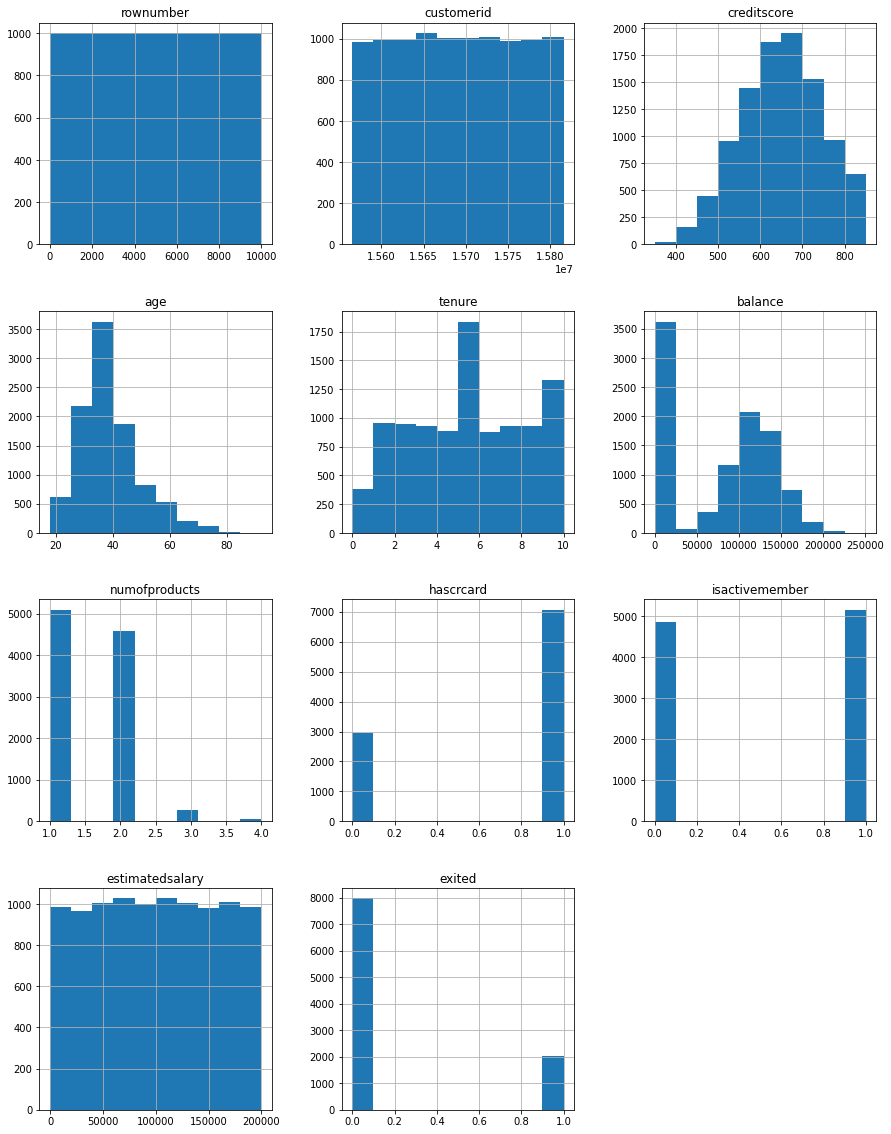

In [16]:
#изучены и описаны следующие параметры:
data.hist(figsize=(15, 20))

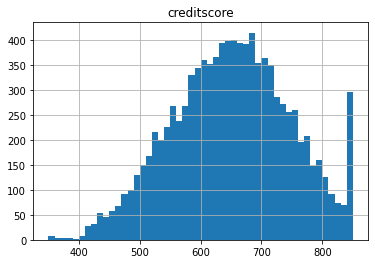

In [17]:
data.hist('creditscore', bins=50);

Есть анамалия на значениях выше 850

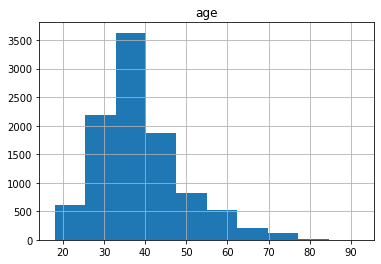

In [18]:
data.hist('age', bins=10);

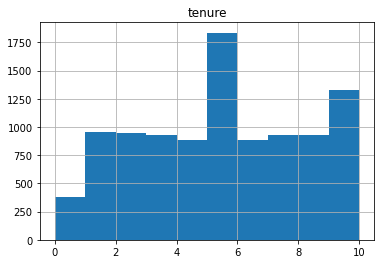

In [19]:
data.hist('tenure', bins=10);

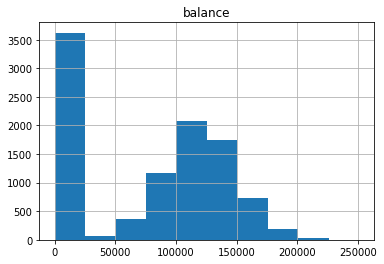

In [20]:
data.hist('balance', bins=10);

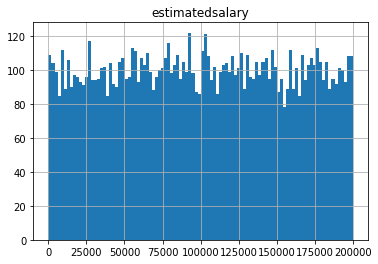

In [21]:
data.hist('estimatedsalary', bins=100);

In [22]:
data.head(5)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [23]:
# surname явно лишнее. Удалим.
data.drop(columns='surname', inplace=True)

In [24]:
# Удалим поле row_number и customer_id
data.drop(columns='rownumber', inplace=True)
data.drop(columns='customerid', inplace=True)

In [25]:
#кореляция в данных
data.corr()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
creditscore,1.000000,-0.003965,-0.000060,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.012606,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.000060,-0.012606,1.000000,-0.007535,0.011409,0.025979,-0.030681,0.010049,-0.015989
balance,0.006268,0.028308,-0.007535,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
numofproducts,0.012238,-0.030680,0.011409,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
hascrcard,-0.005458,-0.011721,0.025979,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
isactivemember,0.025651,0.085472,-0.030681,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimatedsalary,-0.001384,-0.007201,0.010049,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
exited,-0.027094,0.285323,-0.015989,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

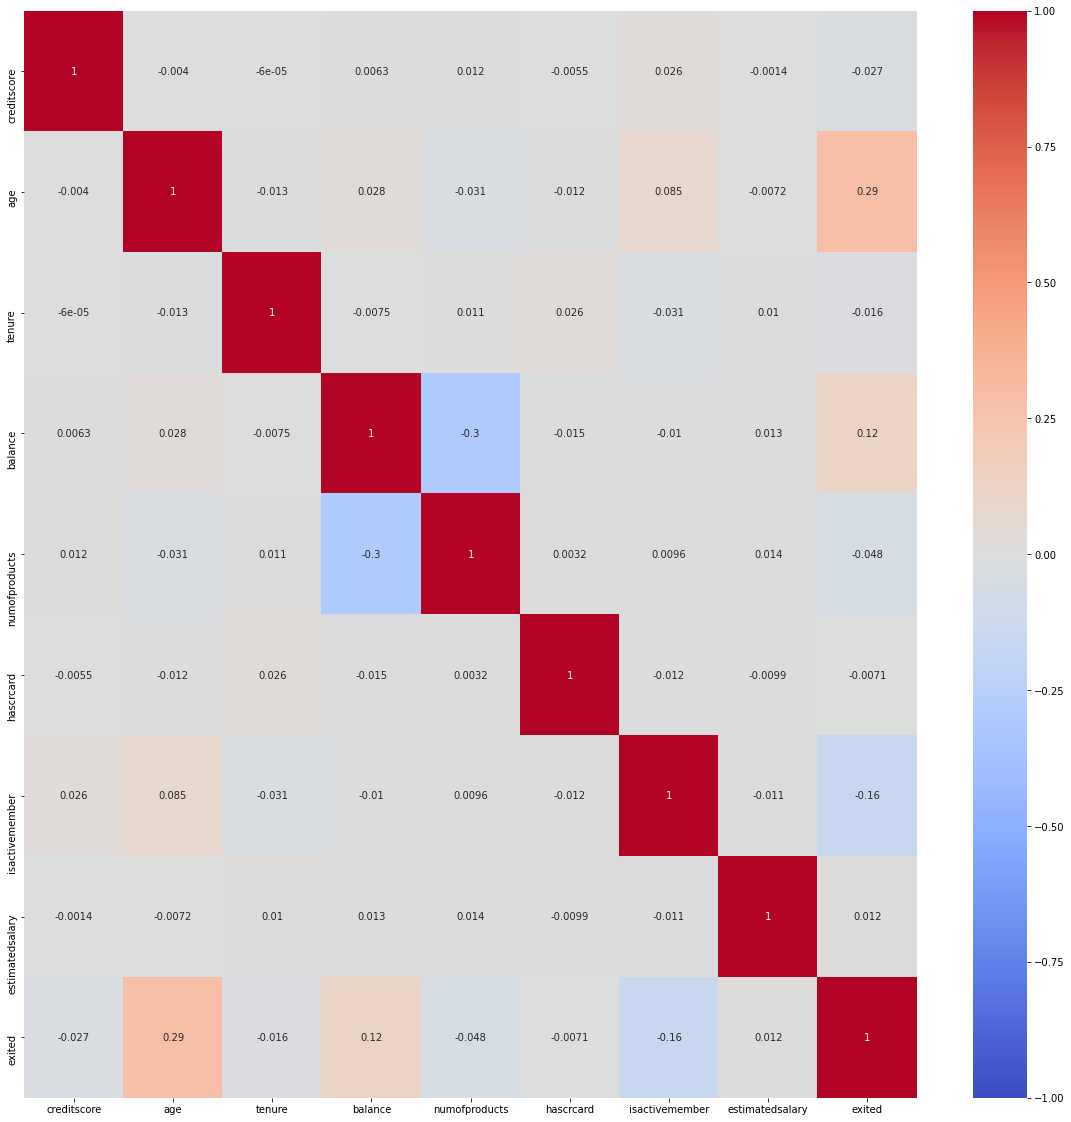

In [27]:
# тепловая карта матричы корреляции
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(data.corr(), vmin= -1, vmax = +1, annot = True, cmap = 'coolwarm')

In [28]:
data_loc = ['creditscore', 'age', 'tenure', 'balance', 'hascrcard', 'isactivemember', 'estimatedsalary']

for index in data_loc:
    correlation = data['exited'].corr(data[index])
    print(f'Корреляция между exited и {index} составляет: {correlation:0.2%}')

Корреляция между exited и creditscore составляет: -2.71%
Корреляция между exited и age составляет: 28.53%
Корреляция между exited и tenure составляет: -1.60%
Корреляция между exited и balance составляет: 11.85%
Корреляция между exited и hascrcard составляет: -0.71%
Корреляция между exited и isactivemember составляет: -15.61%
Корреляция между exited и estimatedsalary составляет: 1.21%


Исследован баланс классов

Изучены модели без учёта дисбаланса

Написаны выводы по результатам исследования

***Матрица дисбаланса***

In [29]:
#прямое кодирование полей для всего
data_ohe = pd.get_dummies(data, drop_first=True)

In [30]:
data_ohe.columns

Index(['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited', 'geography_Germany',
       'geography_Spain', 'gender_Male'],
      dtype='object')

In [31]:
#переименование полей
data_ohe = data_ohe.rename(
    columns={'creditscore':'credit_score','numofproducts':'numof_products','hascrcard':'hascr_card','isactivemember':'isactive_member', 'estimatedsalary':'estimated_salary', 'geography_Germany':'geography_germany', 'geography_Spain':'geography_spain', 'gender_Male':'gender_male'})
data_ohe.head()

,credit_score,age,tenure,balance,numof_products,hascr_card,isactive_member,estimated_salary,exited,geography_germany,geography_spain,gender_male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [32]:
# зададим целевой признак
target = data_ohe['exited']

In [33]:
# подготовим данные
features = data_ohe.drop(['exited'], axis=1)

***Разбивка train_test_split***

In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [35]:
features_train, features_valid, target_train,target_valid = \
    train_test_split(features, target, test_size=0.4, random_state=12345)

In [36]:
# отложенная тестовая выборка
features_valid, features_test, target_valid, target_test = \
    train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

In [37]:
# проверим разбивку на train, valid, test в соотношении 3:1:1
features_train.shape, features_valid.shape, features_test.shape

((6000, 11), (2000, 11), (2000, 11))

***Дисбалнс***

In [38]:
# посмотрим соотношение данных в target
target.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: exited, dtype: float64

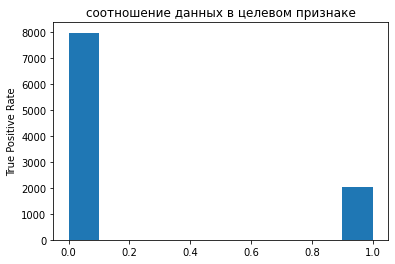

In [39]:
target.plot(kind='hist', )
plt.title('соотношение данных в целевом признаке')
plt.ylabel('True Positive Rate')

plt.show()

***Масштабирование признаков***

In [40]:

features_train.head()

,credit_score,age,tenure,balance,numof_products,hascr_card,isactive_member,estimated_salary,geography_germany,geography_spain,gender_male
7479,567,35,8.0,153137.74,1,1,0,88659.07,0,1,1
3411,711,37,8.0,113899.92,1,0,0,80215.20,0,0,0
6027,850,44,3.0,140393.65,2,0,1,186285.52,1,0,1
1247,512,24,6.0,0.00,2,1,0,37654.31,0,0,1
3716,665,27,2.0,147435.96,1,0,0,187508.06,1,0,0


In [41]:
features_train.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'numof_products',
       'hascr_card', 'isactive_member', 'estimated_salary',
       'geography_germany', 'geography_spain', 'gender_male'],
      dtype='object')

In [42]:
scale = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
scaler.fit(features_train[scale])

StandardScaler()

In [45]:
#  продублируем выборки 
features_train_scaler = features_train.copy()
features_valid_scaler = features_valid.copy()
features_test_scaler = features_test.copy()

In [46]:
# преобразование
features_train_scaler[scale] = scaler.transform(features_train_scaler[scale])
features_valid_scaler[scale] = scaler.transform(features_valid_scaler[scale])
features_test_scaler[scale] = scaler.transform(features_test_scaler[scale])

In [47]:
features_train_scaler.head()

,credit_score,age,tenure,balance,numof_products,hascr_card,isactive_member,estimated_salary,geography_germany,geography_spain,gender_male
7479,-0.886751,-0.373192,1.082277,1.232271,1,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.082277,0.600563,1,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,2,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354288,-1.233163,2,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.101690,1.140475,1,0,0,1.524268,1,0,0


***Модель логистической регрессии без учёта дисбаланса***

In [48]:
# инициируем модель логистической регрессии
model_lene_reg = LogisticRegression(random_state=12345)

In [49]:
# обучим модель
model_lene_reg.fit(features_train, target_train)

LogisticRegression(random_state=12345)

In [50]:
print(model_lene_reg.score(features_train, target_train))
print(model_lene_reg.score(features_valid, target_valid))

0.7945
0.782


In [51]:
# прогнозирование
predicted_valid = model_lene_reg.predict(features_valid)

In [52]:
#критерий f1 лог. регрессия
from sklearn.metrics import f1_score
f1_score(predicted_valid, target_valid)

0.08786610878661089

***Модель дерева решений без учёта дисбаланса***

In [53]:

model_tree = DecisionTreeClassifier(random_state=12345)

In [54]:
model_tree.fit(features_train, target_train)

DecisionTreeClassifier(random_state=12345)

In [55]:
predicted_valid_dt = model_tree.predict(features_valid)

In [56]:
# f1 дерево решений
f1_score(predicted_valid_dt, target_valid)

0.5036319612590799

***С учетом дисбаланса***

In [57]:
# модель логистической регрессии
model_lene_reg_balanced = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')

In [58]:
model_lene_reg_balanced.fit(features_train, target_train)

LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')

In [59]:
# прогнозирование целевого параметра
predicted_valid_balanced = model_lene_reg_balanced.predict(features_valid)

In [60]:
f1_score(predicted_valid_balanced, target_valid)

0.45176848874598063

Вывод: балансировка весов классов дала повышение f1 меры

In [61]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print(confusion_matrix(target_valid, predicted_valid))

[[1382  200]
 [ 210  208]]


левый верхний угол 1783, явный дисбаланс.

получаем:

По главной диагонали (от верхнего левого угла) выстроены правильные прогнозы:

TN в левом верхнем углу;

TP в правом нижнем углу.

Вне главной диагонали — ошибочные варианты:

FP в правом верхнем углу;

FN в левом нижнем углу.

***Полнота***

Выявляет, какую долю положительных среди всех ответов выделила модель. Обычно они на вес золота, и важно понимать, как хорошо модель их находит. 

In [62]:
from sklearn.metrics import recall_score 
print(recall_score(target_valid, predicted_valid))

0.49760765550239233


***Точность***

Точность определяет, как много отрицательных ответов нашла модель, пока искала положительные. Чем больше отрицательных, тем ниже точность.

In [63]:
from sklearn.metrics import precision_score
print(precision_score(target_valid, predicted_valid))

0.5098039215686274


***Точность против полноты***

***F1-мера***

среднее гармоническое полноты и точности.

In [64]:
from sklearn.metrics import f1_score

print(f1_score(target_valid, predicted_valid))

0.5036319612590799


In [65]:
#AUC-ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc_roc = roc_auc_score(target_valid, predicted_valid)
print('auc_roc', auc_roc)

auc_roc 0.6855927025931684


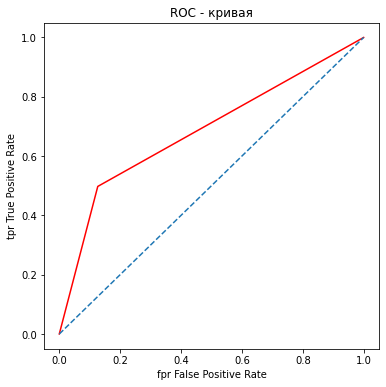

In [66]:
#ROC
fpr, tpr, thresholds = roc_curve(target_valid, predicted_valid)
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr,  color='red')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC - кривая')
plt.xlabel('fpr False Positive Rate')
plt.ylabel('tpr True Positive Rate')
plt.show()

мало что понятно

In [67]:
predicted_valid_proba = model.predict_proba(features_valid)[:, 1]
auc_roc = roc_auc_score(target_valid, predicted_valid_proba)
print('auc_roc', auc_roc)

auc_roc 0.6855927025931684


## Борьба с дисбалансом

Взвешивание классов

In [68]:
model_LR = LogisticRegression(random_state=12345, solver='liblinear')
model_LR.fit(features_train, target_train)
predicted_valid_LR = model_LR.predict(features_valid)

In [69]:
print("F1:", f1_score(target_valid, predicted_valid_LR))

F1: 0.08385744234800838


Балансировка классов

In [70]:
from sklearn.linear_model import LogisticRegression
model_bal = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_bal.fit(features_train, target_train)
predicted_valid_bal = model_bal.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid_bal))

F1: 0.45176848874598063


***Увеличение выборки***

In [71]:
from sklearn.utils import shuffle
def upsample(features, target, repeat):
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

repeat = round(len(target_train[target_train == 0]) / len(target_train[target_train == 1]))
features_upsampled, target_upsampled = upsample(features_train, target_train, repeat)

model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))



F1: 0.4512489927477841


***Уменьшение выборки***

In [72]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

# < moнапишите код здесь >
model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.45856798069187443


не понимаю

Уменьшение и увеличение ыборки не влияют на качетсов модели, в обоих случаях оно плохое

***Изменение порога***

В библиотеке sklearn вероятность классов вычисляет функция predict_proba() (от англ. predict probabilities, «предсказать вероятности»). На вход она получает признаки объектов, а возвращает вероятности.

Строки соответствуют объектам. В первом столбце указана вероятность отрицательного класса, а во втором — положительного (сумма вероятностей равна единице).

In [73]:
import numpy as np
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision, recall))

Порог = 0.00 | Точность = 0.209, Полнота = 1.000
Порог = 0.02 | Точность = 0.209, Полнота = 1.000
Порог = 0.04 | Точность = 0.210, Полнота = 1.000
Порог = 0.06 | Точность = 0.215, Полнота = 0.995
Порог = 0.08 | Точность = 0.222, Полнота = 0.976
Порог = 0.10 | Точность = 0.235, Полнота = 0.957
Порог = 0.12 | Точность = 0.247, Полнота = 0.921
Порог = 0.14 | Точность = 0.257, Полнота = 0.849
Порог = 0.16 | Точность = 0.271, Полнота = 0.792
Порог = 0.18 | Точность = 0.284, Полнота = 0.720
Порог = 0.20 | Точность = 0.305, Полнота = 0.646
Порог = 0.22 | Точность = 0.321, Полнота = 0.577
Порог = 0.24 | Точность = 0.337, Полнота = 0.517
Порог = 0.26 | Точность = 0.335, Полнота = 0.445
Порог = 0.28 | Точность = 0.350, Полнота = 0.400


***PR кривая***

На графике по вертикали наносится значение точности, по горизонтали — полноты. Кривая, показывающая их значения, называется PR-кривой (от англ. Precision и Recall). Чем выше кривая, тем лучше модель.

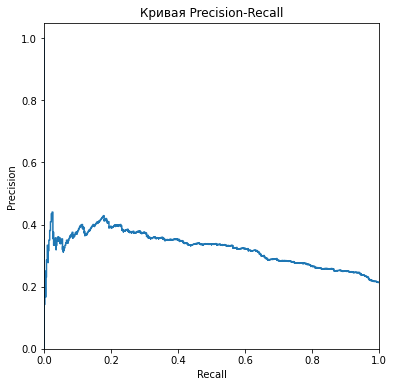

In [74]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

***TPR и FPR***

По горизонтали нанесём долю ложноположительных ответов (FPR), а по вертикали — долю истинно положительных ответов (TPR)

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.6727947180904797


In [76]:
# дерево решени
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid_dt = model.predict(features_valid)
print("F1, для дерева решений:", f1_score(target_valid, predicted_valid_dt))



F1, для дерева решений: 0.48792270531400966


In [77]:
# cлучайный лес
model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid_rf = model.predict(features_valid)
print("F1, для случайного леса:", f1_score(target_valid, predicted_valid_rf))

F1, для случайного леса: 0.6039735099337747


***Вывод:***

При сравнении базовых моделей без дополнительных гиперпараметров, наилучший результат по F1 показала модель случайного леса. Далее будем использовать её для подбора оптимальных гиперпараметров. Изменена формулировка.

## Тестирование модели

Для тестирования модели можно использовать метрики, такие как точность (accuracy), полноту (recall), точность (precision) и F1-меру (F1-score). Можно также построить ROC-кривую и вычислить площадь под ней (AUC-ROC).



In [78]:
# Подбор гиперпараметров на тестовой выборке
model = RandomForestClassifier(n_estimators=100, max_depth=11, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
f1 = f1_score(predicted_test, target_test)
print('f1 лучшие гиперпараметры', f1)

f1 лучшие гиперпараметры 0.609673790776153


In [79]:
# Создадим объект target_p
target_p = pd.Series(list(0 for z in range(len(target_test))))

In [80]:
from sklearn.metrics import accuracy_score
print('Для правильных ответов accuracy в полученной модели', accuracy_score(target_test, predicted_test))
print('Для правильных ответов accuracy в случайной модели', accuracy_score(target_test, target_p))

Для правильных ответов accuracy в полученной модели 0.8265
Для правильных ответов accuracy в случайной модели 0.7885


In [85]:
# Рассчитаем вероятность для построения ROC - кривой
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

In [86]:
probabilities_one_test

array([0.04676039, 0.53690725, 0.11117998, ..., 0.08170455, 0.2187072 ,
       0.3632707 ])

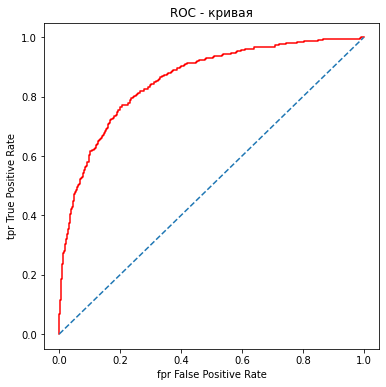

In [87]:
# ROC 
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr,  color='red')
# ROC-кривая 
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC - кривая')
plt.xlabel('fpr False Positive Rate')
plt.ylabel('tpr True Positive Rate')
plt.show()

In [88]:
#  измерим AUC-ROC
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('auc_roc', auc_roc)

auc_roc 0.8572370857075183


Также можно построить матрицу ошибок (confusion matrix) с помощью функции confusion_matrix и визуализировать ее с помощью библиотеки seaborn:



Эти методы помогут оценить качество работы модели и понять, насколько она хорошо справляется с поставленной задачей.

Подбор гиперпараметров,

с помощью цикла, просчитаем показатель f1 для различных значений гиперпараметров

***Вывод***

В ходе работы было проведено прогнозирование оттока клиентов банка на основе исторических данных о поведении клиентов. Для этого была построена модель с максимально возможным значением F1-меры, что позволяет достичь наилучших результатов при прогнозировании оттока.

Для подготовки данных были скорректированы наименования полей, чтобы они были более понятными и информативными. Также были проанализированы выбросы и дубликаты в данных, чтобы исключить их влияние на модель. Были проработаны пропуски в данных, чтобы не потерять важную информацию.

Одним из этапов подготовки данных было преобразование категориальных признаков в дамми переменные. Это позволяет учесть влияние каждой категории на целевую переменную отдельно, что может быть полезно при прогнозировании оттока клиентов.

Для балансировки классов была использована техника upsampling, которая позволила увеличить показатель F1. 

Был проведен выбор лучшей модели для дальнейшего прогнозирования. Были проанализированы модели логистическая регресия, дерево решений и случайный лес.

Таким образом, все необходимые шаги были выполнены для подготовки данных перед построением модели прогнозирования оттока клиентов банка.

Построена ROC - кривая, AUC-ROC = 0.65

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*